In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('/Users/nikhi/Downloads/Titanic-Dataset.csv')



In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# fill age with mean
df['Age']=df['Age'].fillna(df['Age'].mean())

In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
#fill embarked with mode
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [28]:
df.drop('Cabin',axis=1,inplace=True)

In [30]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
df.duplicated().sum()

0

In [34]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [36]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


# data visualization

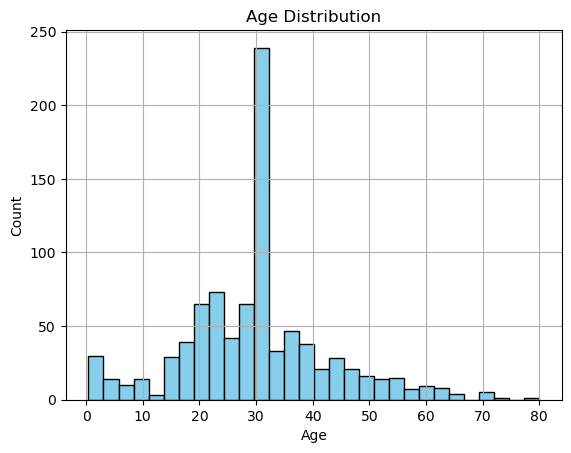

In [42]:
df['Age'].hist(bins=30,color='skyblue',edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

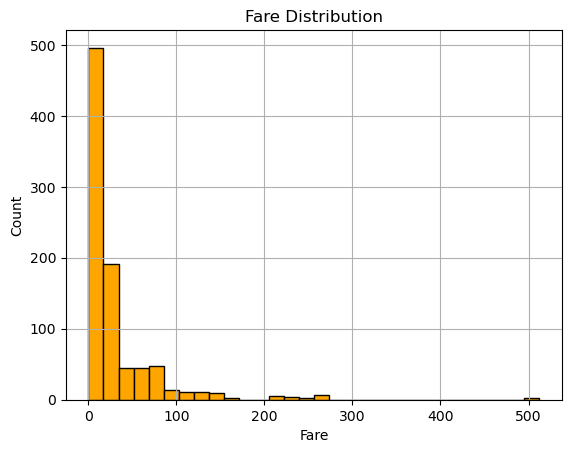

In [46]:
# fare distribution
df['Fare'].hist(bins=30,color='orange',edgecolor='black')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

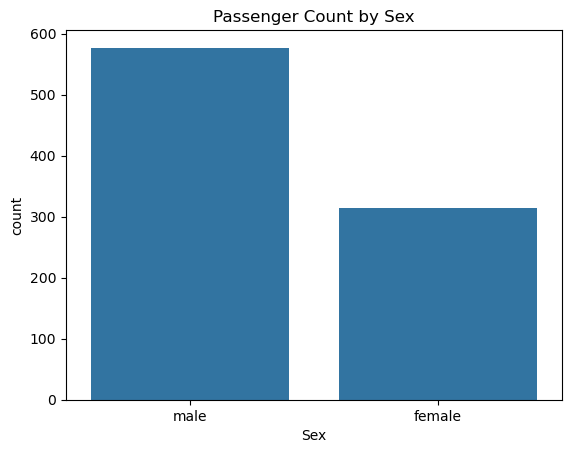

In [12]:
# Count of passengers by Sex
sns.countplot(x='Sex', data=df)
plt.title("Passenger Count by Sex")
plt.show()


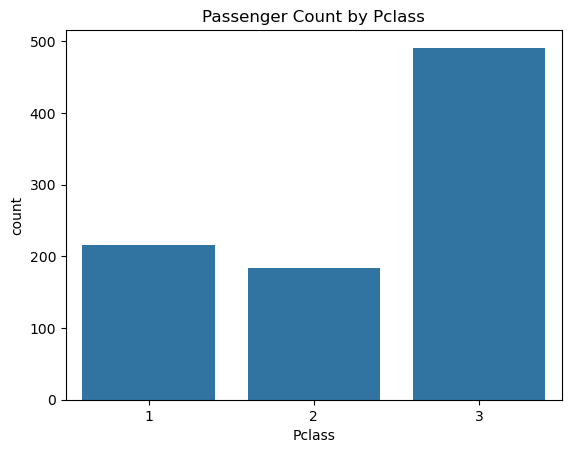

In [14]:
# Count of passengers by Pclass
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Count by Pclass")
plt.show()



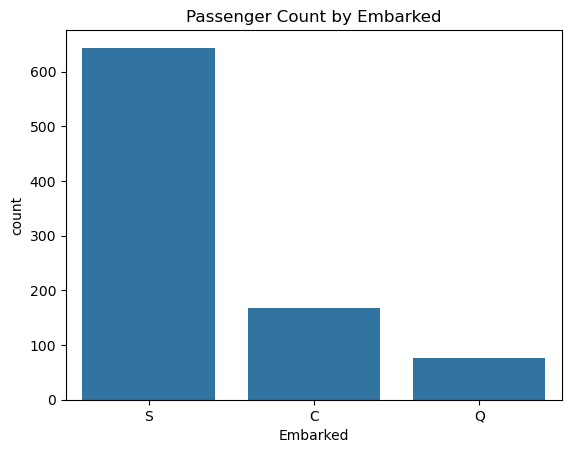

In [16]:
# Count of passengers by Pclass
sns.countplot(x='Embarked', data=df)
plt.title("Passenger Count by Embarked")
plt.show()


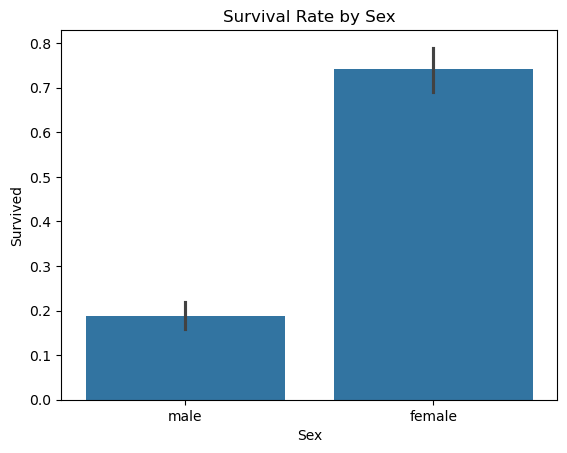

In [18]:
# Survival by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Sex")
plt.show()


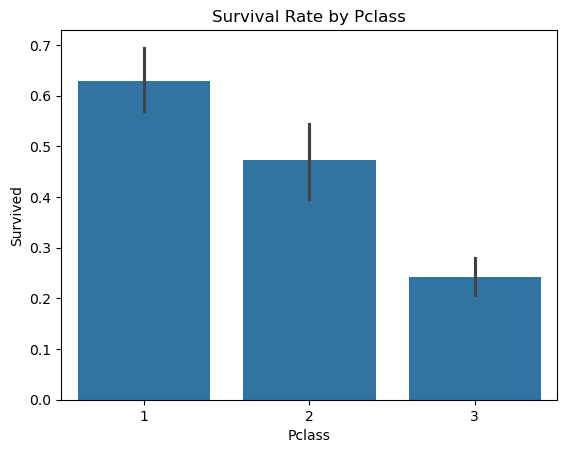

In [10]:
# Survival by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Pclass")
plt.show()

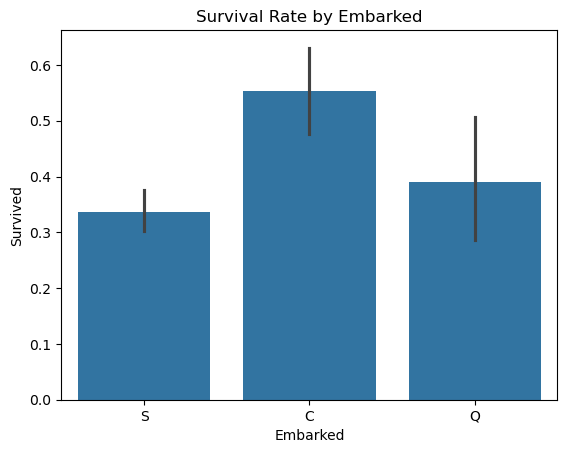

In [12]:
# Survival by Embarked
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Embarked")
plt.show()

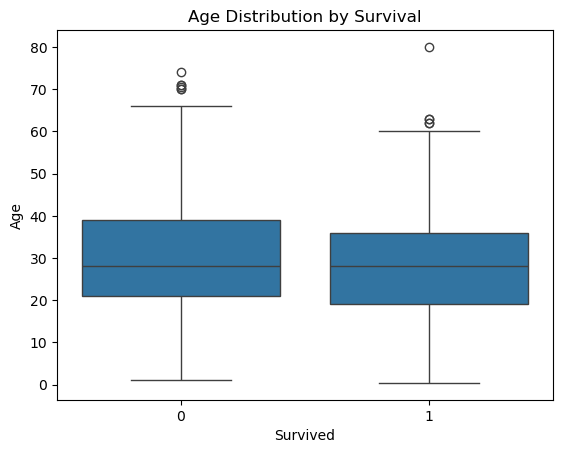

In [14]:
# Survival vs Age
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()

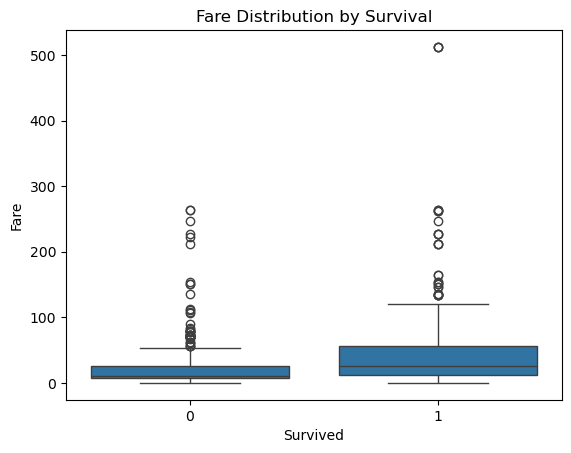

In [16]:
# Survival vs Fare
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by Survival")
plt.show()

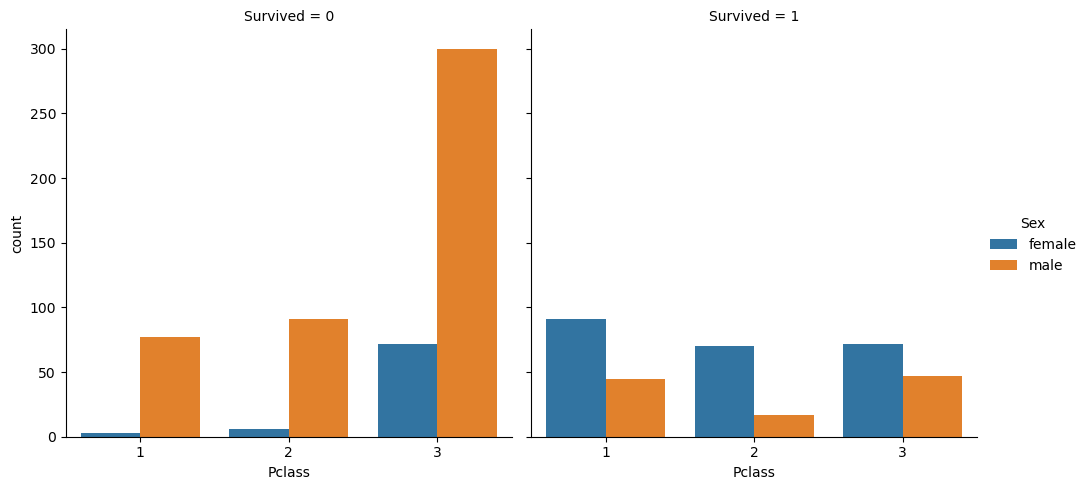

In [18]:
# Survival by Sex and Pclass
sns.catplot(x="Pclass", hue="Sex", col="Survived", data=df, kind="count")

# trends
 Univariate Analysis (single variable)
Age

Most passengers were between 20–40 years old.

Very few passengers were above 60 years.

Fare

Most passengers paid low fares (<50).

A few passengers paid very high fares (>200), which are outliers.

Sex

There were more males (≈ 65%) than females (≈ 35%) on board.

Pclass

Majority of passengers were in 3rd class, followed by 1st and 2nd class.

Embarked

Most passengers boarded from Southampton (S).

Fewer from Cherbourg (C) and Queenstown (Q).

🔹 Bivariate Analysis (with Survived

Sex vs Survival

Females had a much higher survival rate (~74%).

Males had a low survival rate (~19%).
Trend: Gender played a strong role in survival – “women and children first”.

Pclass vs Survival

1st class: Highest survival (~63%).

2nd class: Moderate survival (~47%).

3rd class: Lowest survival (~24%).
Trend: Higher class passengers had better survival chances.

Embarked vs Survival

Cherbourg (C): Highest survival (~55%).

Southampton (S): Lowest survival (~34%).

Queenstown (Q): Around (~39%).
 Trend: Passengers from Cherbourg had better chances, possibly because many were wealthy.

Age vs Survival

Younger children had a higher survival rate.

Middle-aged passengers had lower survival.
 Trend: Children were prioritized in rescue.

Fare vs Survival

Passengers who paid higher fares tended to survive more.
Trend: Wealthier passengers (likely in higher classes) had better survival chances.

🔹 Multivariate Patterns

Pclass + Sex + Survival

Female 1st-class: Very high survival.

Male 3rd-class: Very low survival.
Trend: Combination of gender + class strongly affected survival.